In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('datasets_house_prices.csv')

In [ ]:
df.rename(columns={'Size (sqft)': 'Size', 'Proximity to Downtown (miles)': 'Proximity'}, inplace=True)


In [ ]:
df['Size'] = (df['Size'] - df['Size'].mean()) / df['Size'].std()
df['Bedrooms'] = (df['Bedrooms'] - df['Bedrooms'].mean()) / df['Bedrooms'].std()
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

In [ ]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Adding bias (intercept) term to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1 to each instance
        # Normal Equation: theta = (X_b^T * X_b)^(-1) * X_b^T * y
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add x0 = 1 to each instance
        return X_b.dot(self.theta)

In [ ]:
X = df[['Size', 'Bedrooms', 'Age']].values  # Features (input variables)
y = df['Price'].values  # Labels (target variable)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
train_predictions = lin_reg.predict(X_train)
train_mse = np.mean((train_predictions - y_train) ** 2)
print(f'Training MSE: {train_mse}')


Training MSE: 170277648.5195536


In [ ]:
test_predictions = lin_reg.predict(X_test)
test_mse = np.mean((test_predictions - y_test) ** 2)
print(f'Testing MSE: {test_mse}')

Testing MSE: 167882080.37329447


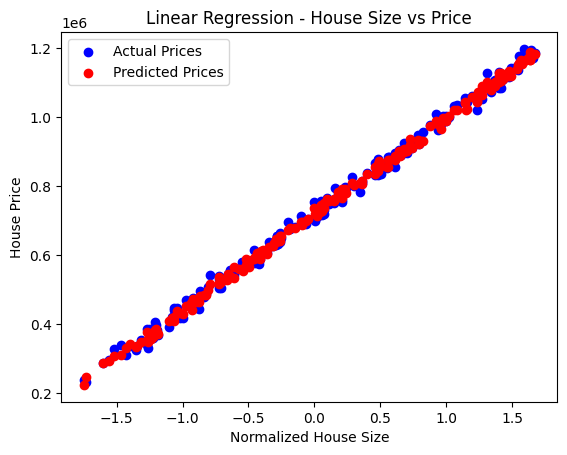

In [ ]:
plt.scatter(X_test[:, 0], y_test, color="blue", label="Actual Prices")
plt.scatter(X_test[:, 0], test_predictions, color="red", label="Predicted Prices")
plt.xlabel('Normalized House Size')
plt.ylabel('House Price')
plt.title('Linear Regression - House Size vs Price')
plt.legend()
plt.show()